In [1]:
from environment import NormalMoveEnv
from experiment import Trajectory
from nn import BetaModel, Model
from rl import Agent

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %matplotlib inline

# Env

In [2]:
env = NormalMoveEnv()

s = env.reset()
print(s)
print(env.step(0))

# ax = env.plot()

[0. 0.]
(array([ 0.8209619 , -0.21380894], dtype=float32), -1, False)


# Trajectory

<AxesSubplot: >

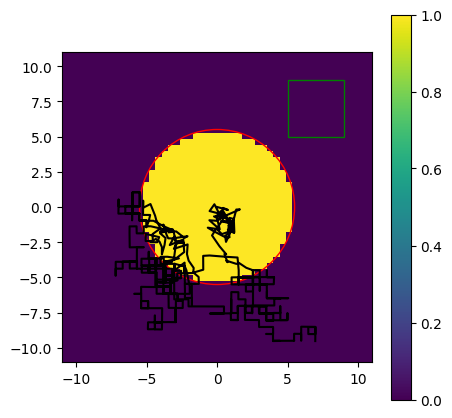

In [3]:
t = Trajectory(env, 1000)
ax = t.plot(env.plot())
ax

# NN Model

1832.1433679129757 -3495.091264442198


<AxesSubplot: >

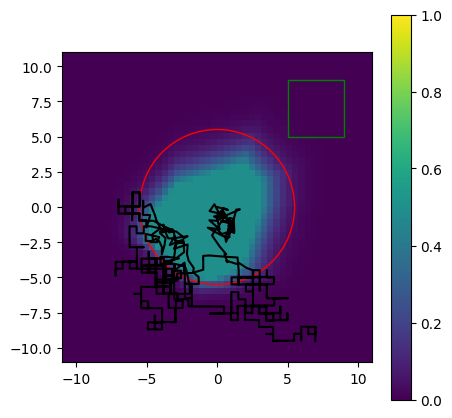

In [4]:
m = Model(env, BetaModel())

ll = m.batch_train(t.run, 500)
print(ll[0], ll[-1])

m.plot(t.plot(env.plot(background=False)))

# RL Model

<AxesSubplot: >

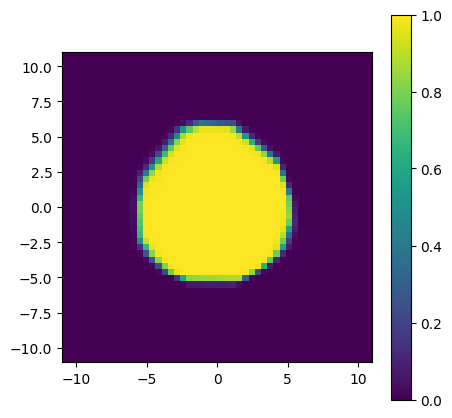

In [6]:
a = Agent(env)
a.train()
a.model.plot()

In [7]:
import torch
print(torch.exp(a.model.params))
print(a.model.model(torch.tensor([[0.,0.], [9.,9.]]).type(torch.DoubleTensor)))

tensor([0.0053, 0.3304], dtype=torch.float64, grad_fn=<ExpBackward0>)
tensor([[9.4753e-05, 9.9991e-01],
        [1.0000e+00, 2.5769e-23]], dtype=torch.float64,
       grad_fn=<SoftmaxBackward0>)


<AxesSubplot: >

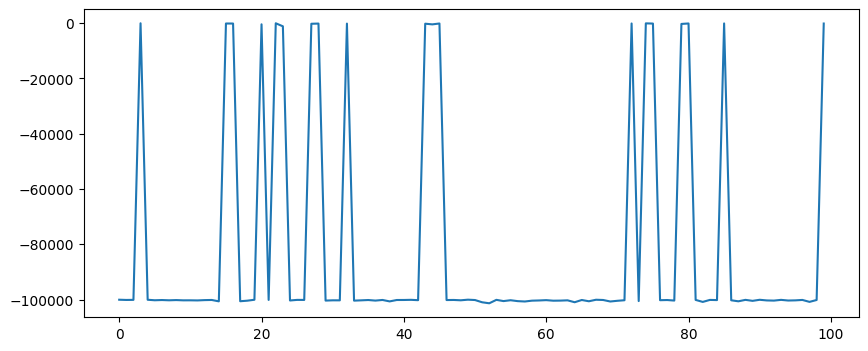

In [8]:
a.plot()

# Teste Retreino

In [9]:
env = NormalMoveEnv()

m = Model(env, BetaModel())

1071.0101665769675 -2227.675632246003


<AxesSubplot: >

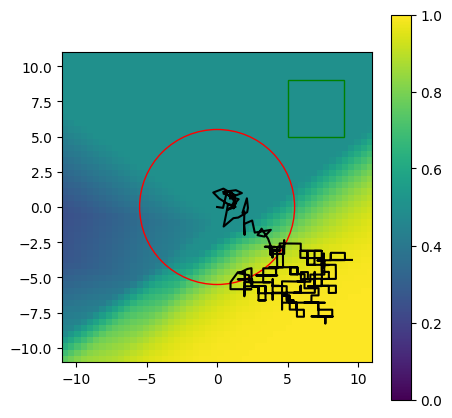

In [10]:
t = Trajectory(env, 1000)
ll = m.batch_train(t.run, 100)
print(ll[0], ll[-1])
m.plot(t.plot(env.plot(background=False)))

<AxesSubplot: >

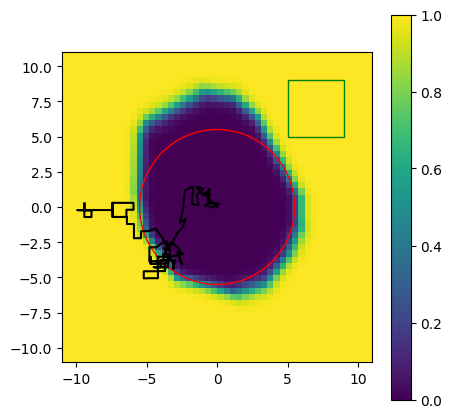

In [11]:
for _ in range(10):
    t = Trajectory(env, 1000)
    ll = m.batch_train(t.run, 100)
m.plot(t.plot(env.plot(background=False)))